# End to End Machine Learning with EDA and Deployment

## Steps of the ML Project
1. Data Overview
       - get the data 
       - view the data
       - Check data sanity
             - CHECK FOR REDUNDANT DATA
             - check for missing values
             - check for zero errors
             - check for corrupt ( non real) characters

2. Exploratory Data Ananlysis
        - Univariate Analysis
             - numerical variables - histograms and boxplots
             - categorical variables- counhtplots
        - Bivariate Ananlysis
             - Categorical vs Numerical - Bivariate barplots
             - Numerical vs Numerical - Lineplots and Scatterplots
         - Multivariate with hue- pairplot
         - Correlation plot - heatmap
         - ... many more
3. Data Preprocessing and Feature Transformations
4. Fit the ML Model to the Data -- various model
5. Evaluate each model and choose the base model to proceed
6. Hyperparameter Tuning --- Optimization of Model
7. Model Interpretation 
8. Model Deployment
9. Model Monitoring 
    

### Step1: 1. Data Overview
       - get the data 
       - view the data
       - Check data sanity
             - CHECK FOR REDUNDANT DATA
             - check for missing values
             - check for zero errors
             - check for corrupt ( non real) characters

In [4]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
print("All libraries are imported")

All libraries are imported


In [5]:
# get the data
data=pd.read_csv("data.csv")

In [6]:
# vieW the data
data.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,Yes
1,1,1,85,66,29,0,26.6,0.351,31,No
2,2,8,183,64,0,0,23.3,0.672,32,Yes
3,3,1,89,66,23,94,28.1,0.167,21,No
4,4,0,137,40,35,168,43.1,2.288,33,Yes


In [8]:
# LOOK at the columns
data.columns

Index(['Unnamed: 0', 'Pregnancies', 'Glucose', 'BloodPressure',
       'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age',
       'Outcome'],
      dtype='object')

In [9]:
# look at the missing values and info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
 9   Outcome                   768 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 60.1+ KB


**Observations**
1. The dataset has 10 columns and 768 rows
2. Unnamed is a redundant column to be dropped
3. Correct Zero errors


In [10]:
# check the descriptives
data.describe().T


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,768.0,383.500000,221.846794,0.000,191.75000,383.5000,575.25000,767.00
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


In [11]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [13]:
zerofiller=lambda x: x.replace(0, x.median())
cols=data.columns[1:6].tolist()
data[cols]=data[cols].apply(zerofiller, axis=0)

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
Insulin,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


In [15]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [17]:
data[~data.applymap(np.isreal).any(1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


There are no corrupt characters in the data and the dat is free of zero errors and nulls. So we are good to go for EDA. We can slso check for duplicates

2. Exploratory Data Ananlysis
        - Univariate Analysis
             - numerical variables - histograms and boxplots
             - categorical variables- counhtplots
        - Bivariate Ananlysis
             - Categorical vs Numerical - Bivariate barplots
             - Numerical vs Numerical - Lineplots and Scatterplots
         - Multivariate with hue- pairplot
         - Correlation plot - heatmap

In [18]:
#univariate histograms
def histograms(data):
    print("Histograms")
    data.hist()
    plt.tight_layout()
    plt.show()

Histograms


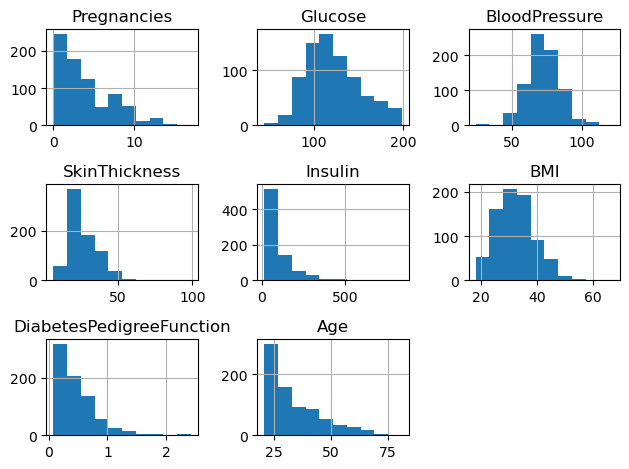

In [19]:
histograms(data)

In [20]:
def histplot_boxplot(data, feature, bins=None, figsize=(12,7)):
    fig, (ax_box, ax_hist)=plt.subplots(
    nrows=2,
    sharex=True,
    gridspec_kw={"height_ratios":(0.25, 0.75)},
    figsize=figsize)
    
    sns.boxplot(data=data, x=feature, showmeans=True, ax=ax_box, color="violet")
    sns.histplot(data=data, x=feature, bins=bins,ax=ax_hist, pallete="winter") if bins else sns.histplot(data=data,
                                                        x=feature, ax=ax_hist)
    ax_hist.axvline(data[feature].mean(), color='green', linestyle="--")
    ax_hist.axvline(data[feature].median(), color='black', linestyle="-")
    
    plt.show()
    

In [22]:
plt.style.use("fivethirtyeight")

Pregnancies


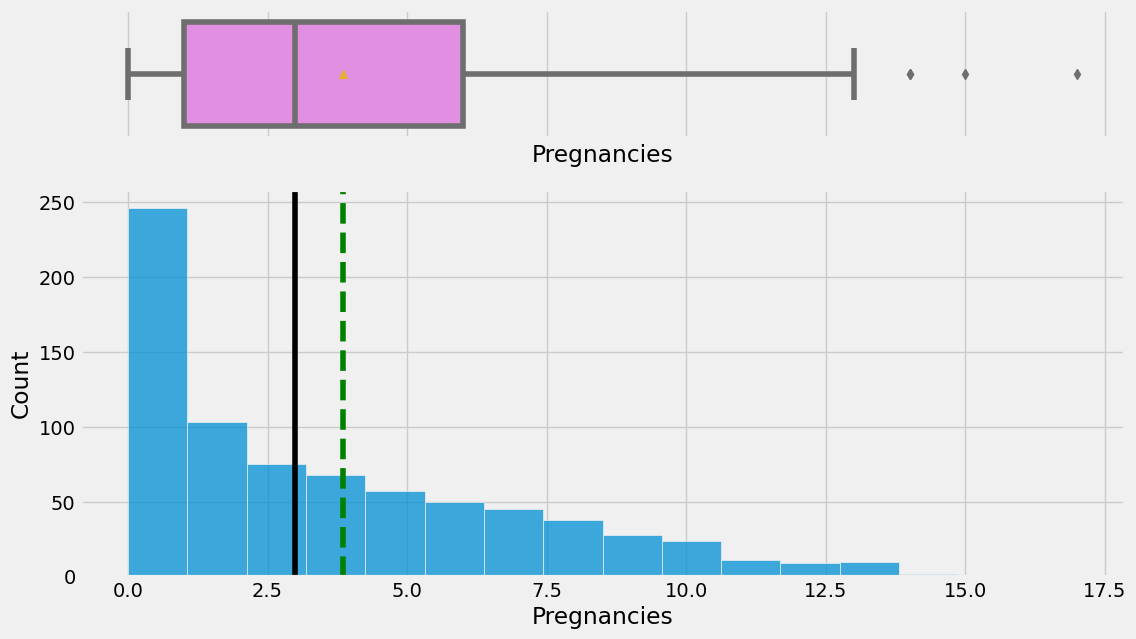

Glucose


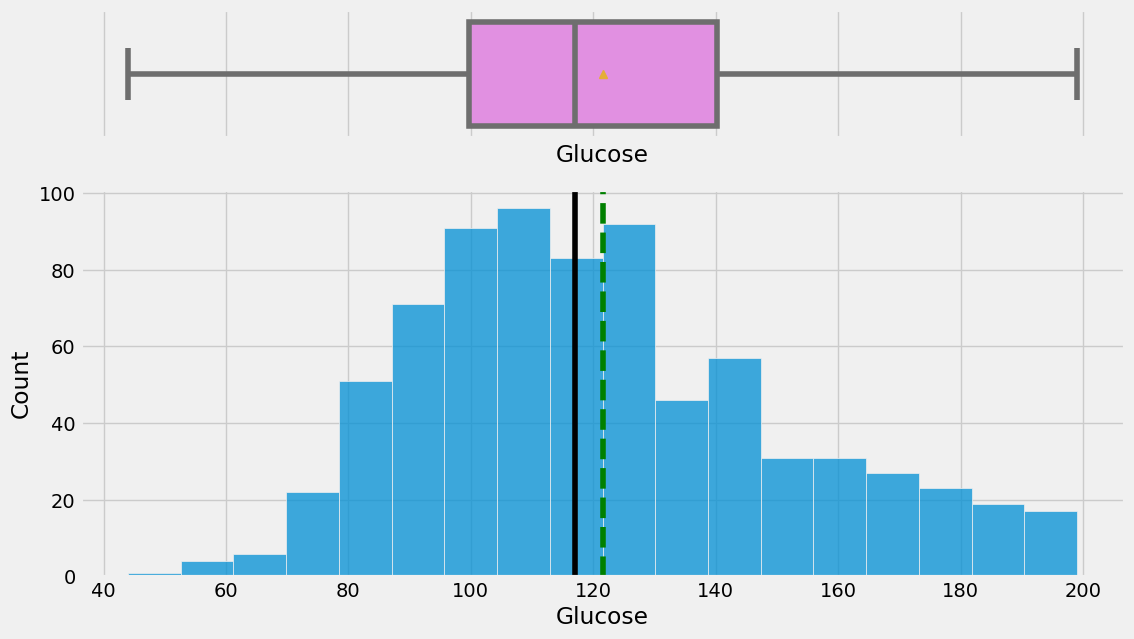

BloodPressure


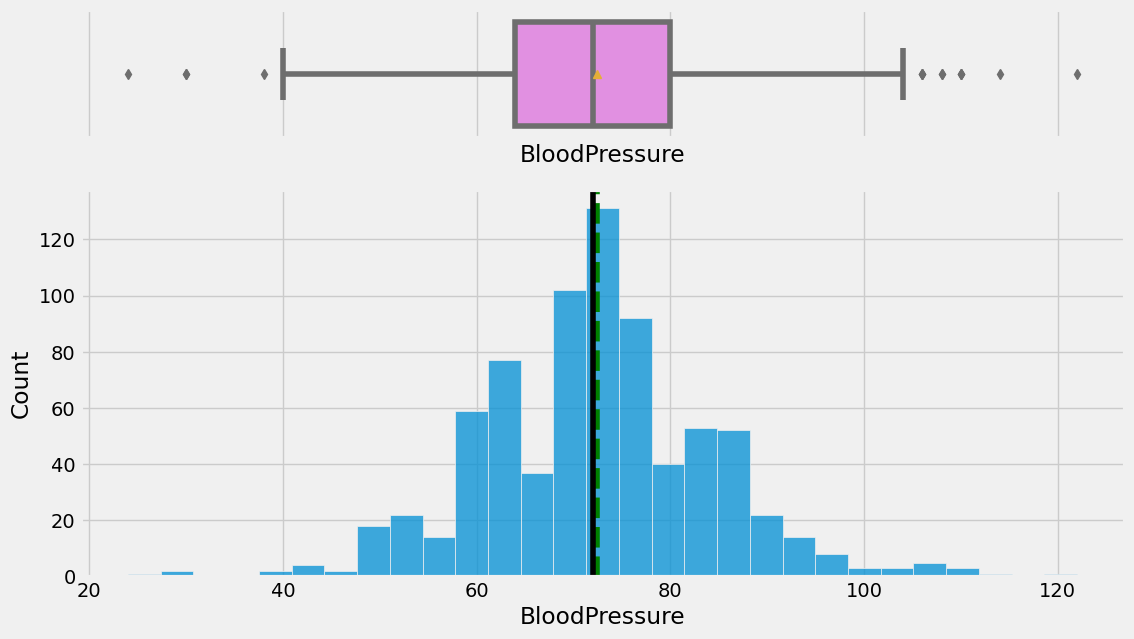

SkinThickness


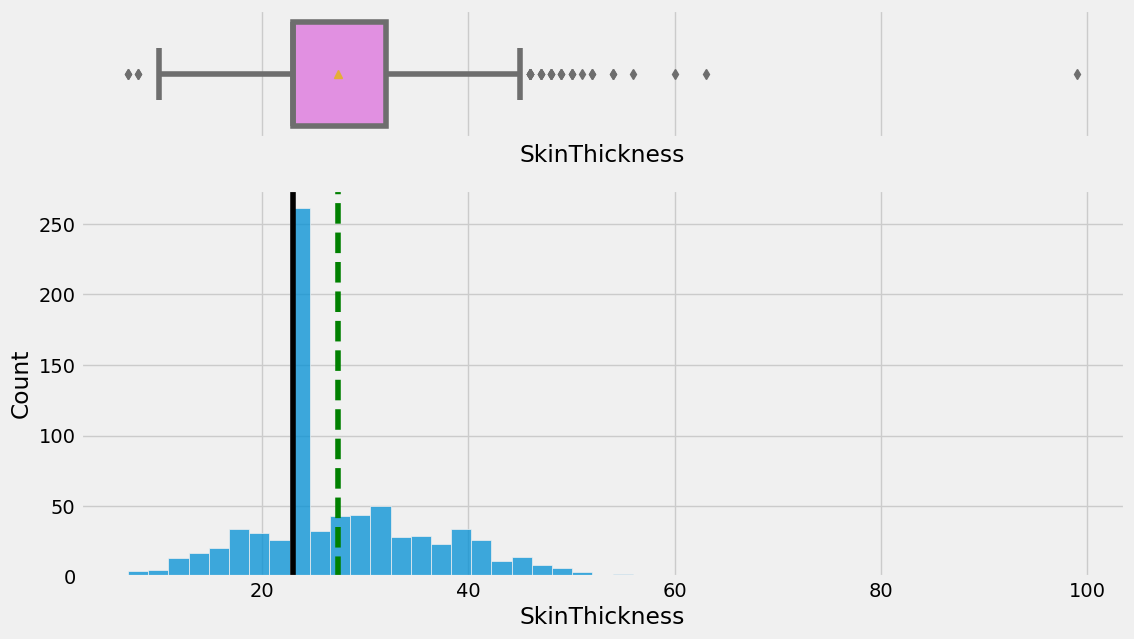

Insulin


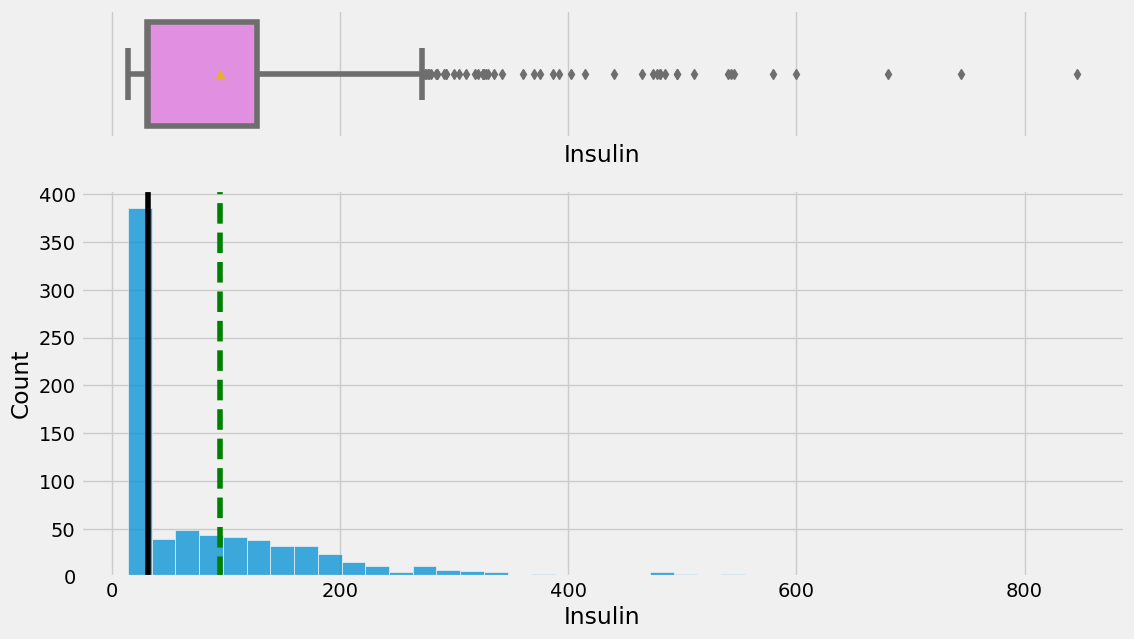

BMI


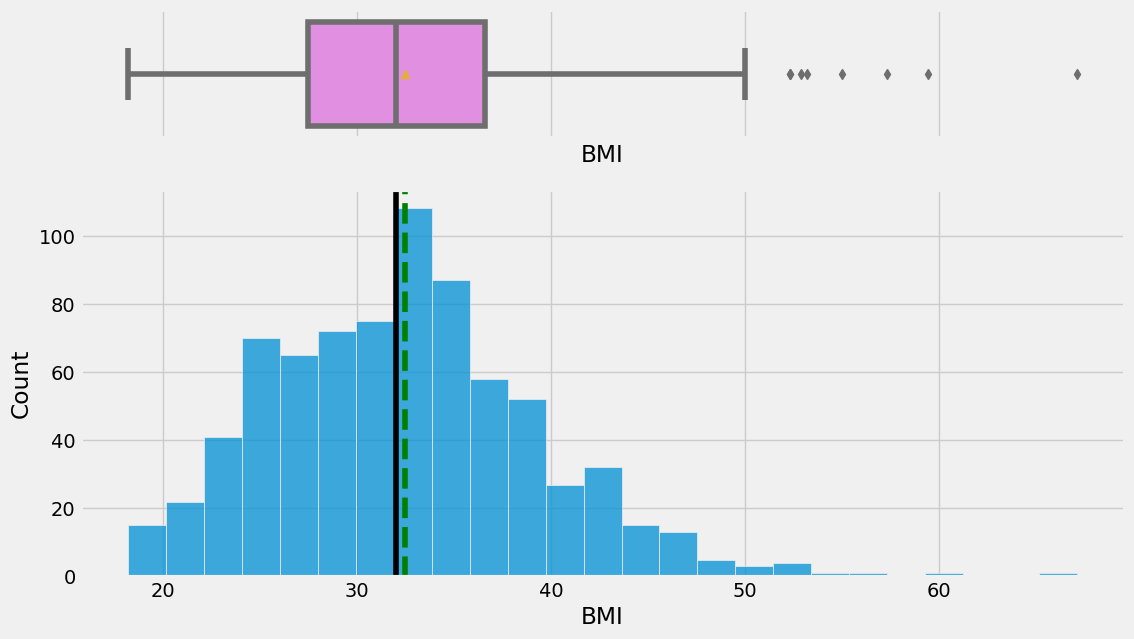

DiabetesPedigreeFunction


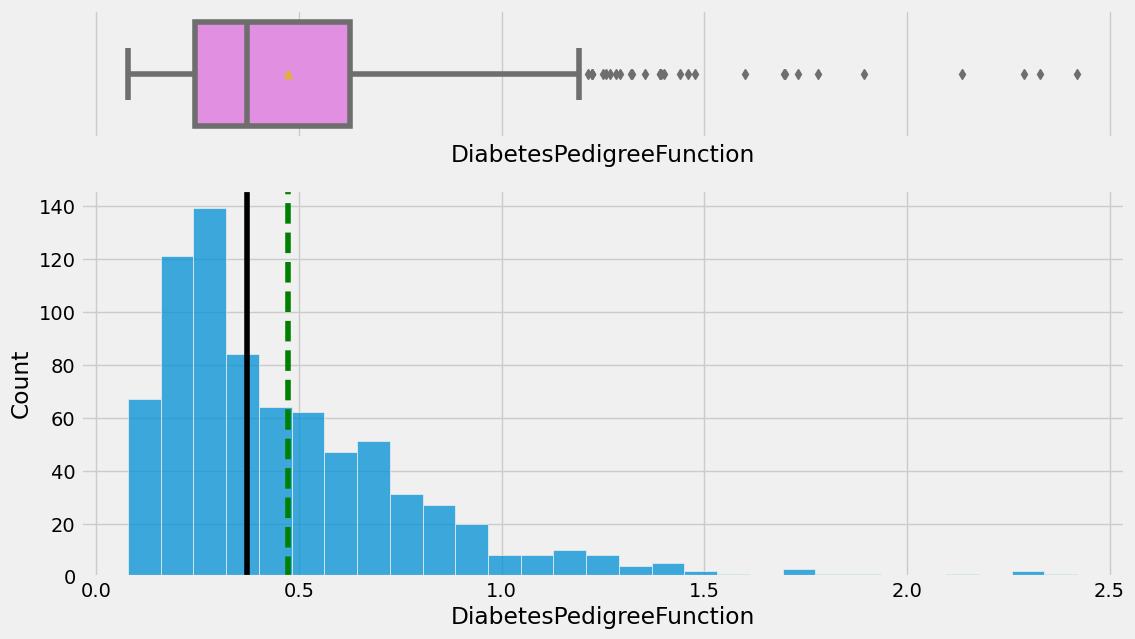

Age


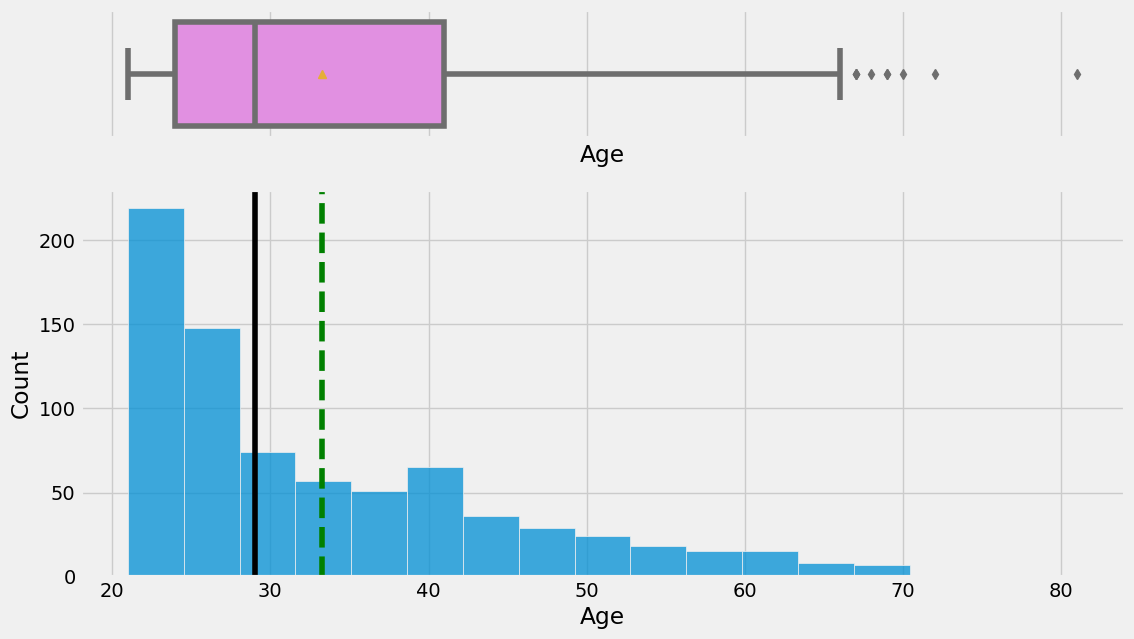

In [23]:
for col in data.select_dtypes(exclude="O").columns:
    print(col)
    histplot_boxplot(data=data, feature=col)

In [28]:
def countplot(data, feature):
    plt.figure(figsize=(12,7))
    ax=sns.countplot(data=data, x=feature, color="green")
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate("{:.3g}%".format(100.*y/len(data)), (x.mean(), y), ha="center", va="bottom")
    plt.show()
    
    

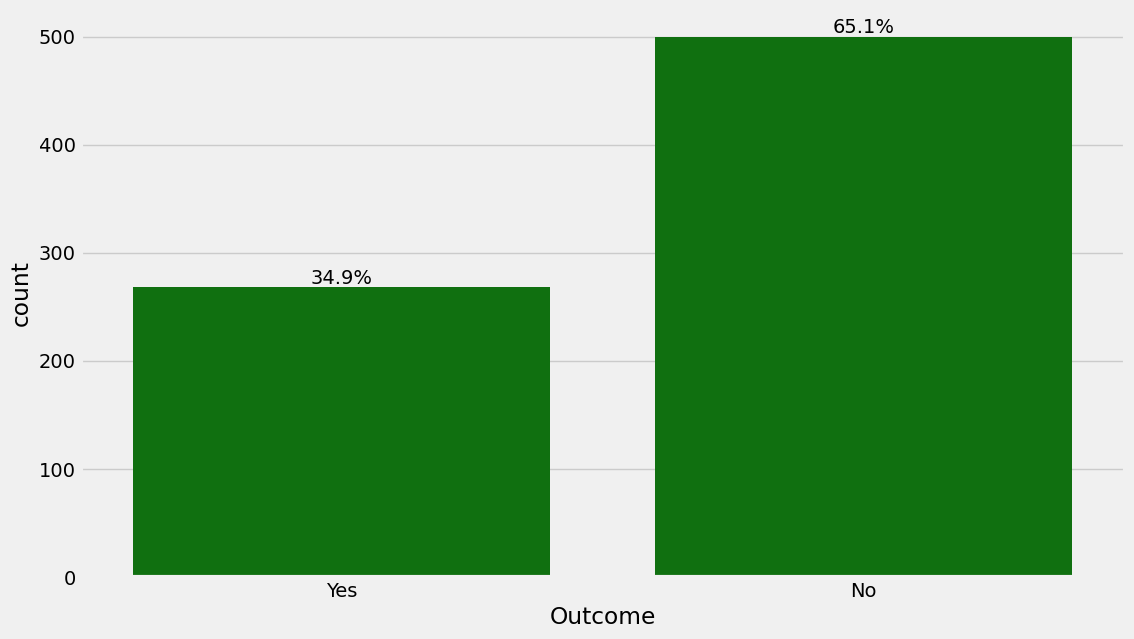

In [29]:
countplot(data,'Outcome' )

# To Be Continued